In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
from calendar import month_abbr

folder = '/home/gandelli/dev/data/chains/month/'


df = pd.read_csv(folder + 'page.tsv', sep='\t')
df['month'] = pd.to_datetime(df.month)

In [37]:
df

,titolo,month,nchain,nrev_chain,mean,longest,more_than5,more_than7,more_than9,G,involved
0,101_Dalmatian_Street,2019-07-01,1,3,3.0,3,0,0,0,0,"{'Moxmarco', '95.74.148.124'}"
1,101_Dalmatian_Street,2019-12-01,1,4,4.0,4,0,0,0,0,"{'Moxmarco', '87.19.234.101', '80.181.45.118'}"
2,101_Dalmatian_Street,2020-01-01,1,3,3.0,3,0,0,0,0,"{'Moxmarco', '79.21.68.127'}"
3,1039,2008-02-01,1,3,3.0,3,0,0,0,170452,"{'Biobot', 'Ary29'}"
4,10_aprile,2006-08-01,1,4,4.0,4,0,0,0,0,"{'Ngiolett', '151.55.216.138', 'Gac'}"
...,...,...,...,...,...,...,...,...,...,...,...
193620,Zodiaco,2012-01-01,1,3,3.0,3,0,0,0,0,"{'Alfio66', '62.196.29.116'}"
193621,Zodiaco,2016-06-01,1,4,4.0,4,0,0,0,2901,"{'Pinea', 'Custeped', 'Bramfab'}"
193622,Zodiaco_-_Il_libro_perduto,2014-12-01,1,3,3.0,3,0,0,0,0,"{'Danyele', '151.74.27.127', '151.74.114.91'}"
193623,Zona_temperata,2010-10-01,1,5,5.0,5,1,0,0,0,"{'93.32.236.202', '151.62.34.169'}"


In [38]:
grouped = df[['titolo','month']].groupby('titolo').count().sort_values('month', ascending = False)
grouped['month'].to_csv(folder + 'grouped_by_page_sorted.tsv', sep="\t", quoting=csv.QUOTE_NONE)


In [69]:
#df.sort_values('nrev_chain', ascending = False).head(20)
df[['titolo', 'nchain','nrev_chain', 'more_than5','more_than7','more_than9']].groupby('titolo').sum().sort_values('nrev_chain', ascending=False).head(20)

,nchain,nrev_chain,more_than5,more_than7,more_than9
titolo,,,,,
Personale_della_WWE,240,993,63,20,8
Serie_A,196,759,33,7,2
Matteo_Renzi,178,721,37,9,2
Juventus_Football_Club,190,716,25,9,1
Napoli,176,654,25,3,2
Milano,162,650,23,9,6
Associazione_Sportiva_Roma,176,621,16,2,1
Partito_Democratico_(Italia),162,605,19,6,1
Roma,154,603,24,8,5


Text(0.5, 1.0, 'number of reverts by month')

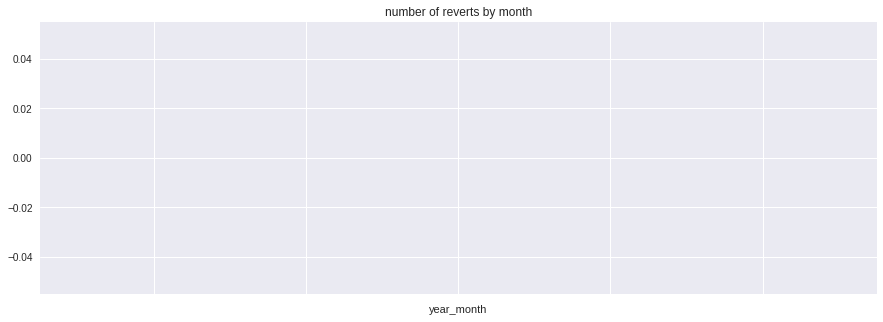

In [33]:
plt.style.use('seaborn')
grouped = df_rev.groupby('year_month').sum()
ax = grouped['nrev'].plot(figsize=(15,5))
plt.title('number of reverts by month')

In [42]:
#%% analyze the json pages about chains 
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from datetime import datetime

inizio = datetime.now()
print(inizio.strftime(" %H:%M:%S"))



# read jsons file 
dataset_folder = '/home/gandelli/dev/data/chains/page/'
i = 10 # number of files in the wars folder

pagine = 0

reverts = {}
chain_month = {}
mean = {}
utenti = [] 



m_pages_df = []
reverts_df = []

for i in range (0,i):
    dump_in = open(f"{dataset_folder}wars_{i}.json")
    line = dump_in.readline()
    while(line != ''):
        line = dump_in.readline()
        if line == '{}]' or line == '':
            continue

        page = json.loads(line[:-2])

        m_pages_df.append({ 'title': page['title'], 'M': page['M'], 'G':  page['G']})
        reverts_df.append((page['title'], page['n_reverts'],page['n_reverts_in_chains']))


        reverts[page['title']] = page['longest']
        for chain in page['chains']:
            chain_month[chain['start']] = chain['len']
            mean[page['title']] = page['mean']
            for utente in list(chain['users']):
                utenti.append(utente)
        
        
print(datetime.now() - inizio)




 17:18:55
0:00:03.729531


Text(0.5, 1.0, 'number of chains by month')

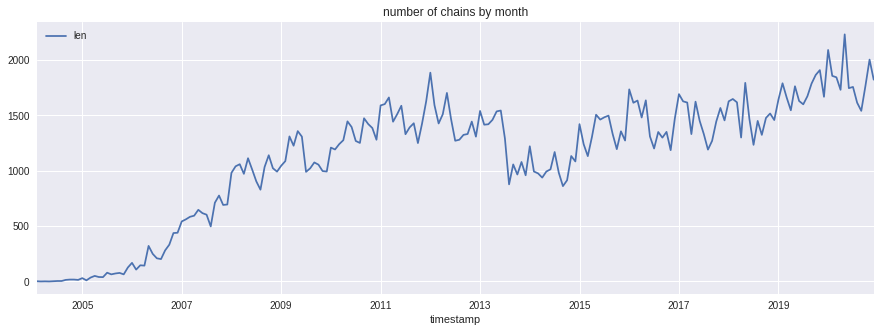

In [49]:
df = pd.DataFrame(utenti)
grouped = df.groupby([0])[0].count().reset_index(name="count").sort_values('count', ascending = False)
grouped

,0,count
239654,Phantomas,8553
243340,Shivanarayana,6501
247383,Vituzzu,5771
233812,LukeWiller,4965
227074,Gac,4855
...,...,...
88524,62.18.240.167,1
88525,62.18.240.178,1
88526,62.18.240.186,1
88527,62.18.240.200,1


In [55]:
reverts_df = pd.DataFrame(reverts_df, columns=['title', 'n_reverts', 'n_reverts_in_chains'])
reverts_df = reverts_df[reverts_df['n_reverts'] > 10]
reverts_df['rapporto'] = reverts_df['n_reverts_in_chains'] / reverts_df['n_reverts']
mean_rapporto = reverts_df['n_reverts_in_chains'].sum()/reverts_df['n_reverts'].sum()
reverts_df = reverts_df.sort_values('rapporto', ascending=False)
reverts_df.tail(30)

,title,n_reverts,n_reverts_in_chains,rapporto
77007,Moglia,413,3,0.007264
87710,Scorpions,1108,8,0.007220
39962,Isole_Falkland,449,3,0.006682
80563,Al_Bano,462,3,0.006494
43967,Teppisti_dei_Sogni,464,3,0.006466
19196,Calimera,466,3,0.006438
48774,Imola,1088,7,0.006434
85383,Festival_Oriente_Occidente,470,3,0.006383
76655,Maria_Antonietta_d'Asburgo-Lorena,1911,12,0.006279
29725,Episodi_di_Camera_Café_(sesta_stagione),479,3,0.006263


In [81]:
df = pd.read_csv('/home/gandelli/dev/data/generic/reverts.tsv', sep='\t')
df['year_month'] = pd.to_datetime(df.year_month)

In [82]:
df

,title,pageid,year_month,nrev,nrev_vandalism
0,^,1071890,2007-04-01,1,0
1,^^,1071890,2007-04-01,1,0
2,¨,3785887,2013-08-01,1,0
3,¨,3785887,2014-07-01,1,0
4,¨,3785887,2016-03-01,2,0
...,...,...,...,...,...
3435549,Џ,229469,2010-02-01,1,0
3435550,Џ,229469,2010-03-01,2,0
3435551,Џ,229469,2010-03-01,1,0
3435552,Ш,229441,2011-01-01,1,0


Text(0.5, 1.0, 'number of reverts by month')

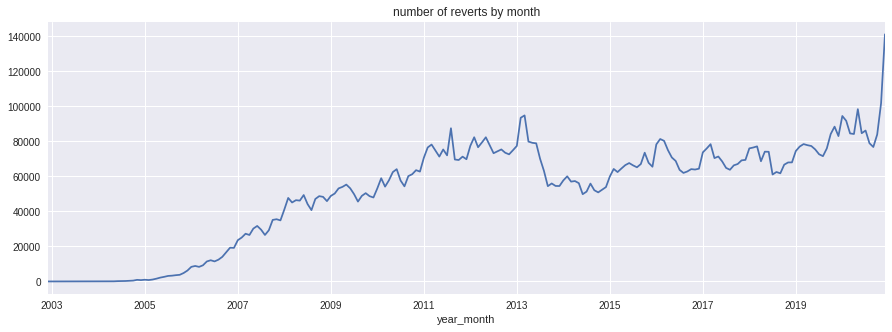

In [83]:
plt.style.use('seaborn')
grouped = df.groupby('year_month').sum()
ax = grouped['nrev'].plot(figsize=(15,5))
plt.title('number of reverts by month')

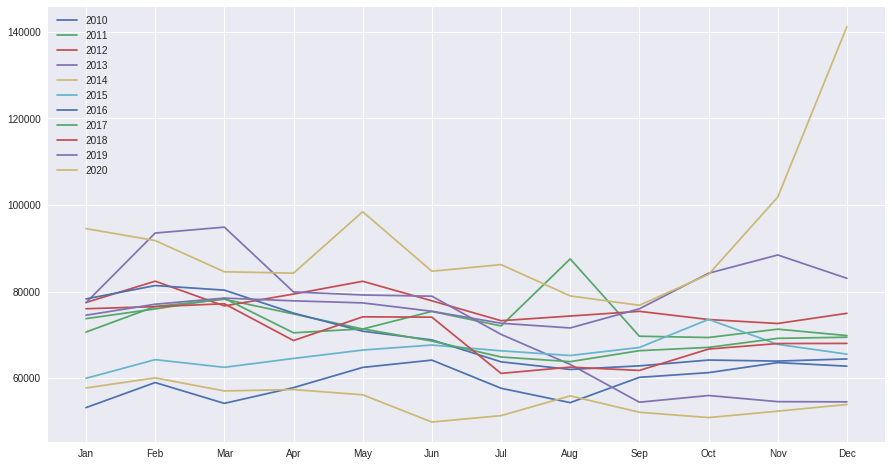

In [91]:
grouped = df.groupby('year_month', as_index=False).sum().sort_values('year_month')
plt.figure(figsize=(15,8))
x = month_abbr[1:13]
for i in range(2010,2021):
    plt.plot(x,grouped[grouped['year_month'].dt.year == i]['nrev'], label = i)
plt.legend()

<AxesSubplot:>

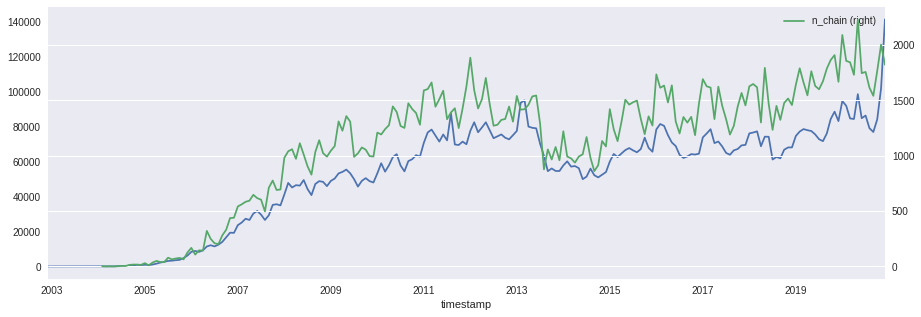

In [94]:
plt.style.use('seaborn')

df_rev = pd.read_csv('/home/gandelli/dev/data/generic/reverts.tsv', sep='\t')
df_rev['year_month'] =  pd.to_datetime(df_rev['year_month'])
grouped = df_rev.groupby('year_month').sum()

df_chain = pd.DataFrame(chain_month.items(),  columns=['timestamp', 'n_chain'])
df_chain['timestamp'] = pd.to_datetime(df_chain['timestamp'])
df_chain = df_chain.groupby(pd.Grouper(key='timestamp', freq='M')).count()

ax = grouped['nrev'].plot(figsize=(15,5))
df_chain.plot(figsize=(15,5), ax = ax, secondary_y=True)


In [95]:
#%%
import pandas as pd
import matplotlib.pyplot as plt
import csv
from calendar import month_abbr

file = '/home/gandelli/dev/data/admin/page/mutuals.tsv'

df = pd.read_csv(file, sep='\t', index_col=['page_id' ])
df.dropna()
df['page_name']= df['page_name'].astype(str)
#df['year_month'] = pd.to_datetime(df.year_month).dt.date

/home/gandelli/.pyenv/versions/3.9.0/envs/env-wiki/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [96]:
df

,page_name,year_month,M,mut_adm_adm,mut_adm_reg,mut_reg_reg,mut_not_reg,mut_reg
page_id,,,,,,,,
0,nan,NaN,0,0,0,0,0,0
1071890,^^,2007-04,0,0,0,0,0,0
3785887,¨,2013-08,0,0,0,0,0,0
3785887,¨,2014-07,0,0,0,0,0,0
3785887,¨,2016-03,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
615555,Ӱ,2011-07,0,0,0,0,0,0
633984,Ӳ,2008-08,0,0,0,0,0,0
640464,Ӯ,2011-07,0,0,0,0,0,0


In [105]:
df.groupby('page_name').max()

,M,mut_adm_adm,mut_adm_reg,mut_reg_reg,mut_not_reg,mut_reg
page_name,,,,,,
!,0,0,0,0,0,0
!!,0,0,0,0,0,0
!!!,0,0,0,0,0,0
!!!Fuck_You!!!,0,0,0,0,0,0
!!!Fuck_You!!!_and_Then_Some,0,0,0,0,0,0
...,...,...,...,...,...,...
∀_Gundam,0,0,0,0,0,0
⊿,0,0,0,0,0,0
♥_(Heart),0,0,0,0,0,0


In [100]:
df.sort_values('page_name')

,page_name,year_month,M,mut_adm_adm,mut_adm_reg,mut_reg_reg,mut_not_reg,mut_reg
page_id,,,,,,,,
1764604,\t2018-12\t0\t0\t0\t0\t0\t0\n244813\t(_)\t2006...,2010-07,0,0,0,0,0,0
554835,!,2007-07,0,0,0,0,0,0
3205159,!!,2015-08,0,0,0,0,0,0
3205159,!!,2015-06,0,0,0,0,0,0
331683,!!!,2015-08,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2459721,⊿,2012-09,0,0,0,0,0,0
5930792,♥_(Heart),2016-06,0,0,0,0,0,0
5930792,♥_(Heart),2017-09,0,0,0,0,0,0


In [104]:
df[df['year_month'] == '2010-07']

,page_name,year_month,M,mut_adm_adm,mut_adm_reg,mut_reg_reg,mut_not_reg,mut_reg
page_id,,,,,,,,
2410817,"102ª_Divisione_motorizzata_""Trento""",2010-07,0,0,0,0,0,0
2140520,Ansaldo_105/25_M.43,2010-07,0,0,0,0,0,0
817235,10801_Lüneburg,2010-07,0,0,0,0,0,0
5183,10_agosto,2010-07,0,0,0,1,1,1
2747909,10_cose_che_odio_di_te_(serie_televisiva),2010-07,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
737769,Žukov,2010-07,0,0,0,0,0,0
2433169,Züst_(azienda),2010-07,0,0,0,0,0,0
154124,Zwischbergen,2010-07,0,0,0,0,0,0


In [103]:
df = df[~df['page_name'].str.contains(r'\\', na = False)]


In [107]:
gr = df.groupby('page_name')['M'].max()


In [111]:
gr.sort_values(ascending= False).head(20)

page_name
Laura_Pausini                          543342870
Associazione_Sportiva_Roma             498576512
Juventus_Football_Club                 397646018
Milano                                 372915620
Napoli                                 300987792
Football_Club_Internazionale_Milano    244202985
Tiziano_Ferro                          225297492
Valentino_Rossi                        218733680
Roma                                   196137114
Silvio_Berlusconi                      184693524
Lega_Nord                              168073614
Palermo_Football_Club                  154996080
Società_Sportiva_Calcio_Napoli         137182135
Società_Sportiva_Lazio                 114960992
Statistiche_della_Serie_A              112059096
Gianluigi_Buffon                       106719720
Galileo_Galilei                         96894675
Unione_Calcio_Sampdoria                 93436432
Allianz_Stadium_(Torino)                81100338
Massacri_delle_foibe                    75216720
Name: M, d

<AxesSubplot:xlabel='year_month'>

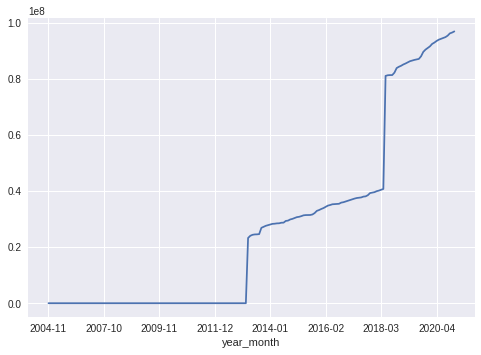

In [120]:
df[df['page_name'] == 'Galileo_Galilei'].set_index('year_month')['M'].plot()
plt.title('Galileo Galileo')